# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Amanda | Choy | Amanda Choy, 27/11/2024 | 5 | 25% |
| Member 2: | Di | Su | Di Su, 27/11/2024 | 5 | 25% |
| Member 3: | Jeelkumar  | Patel | Jeelkumar Patel, 27/11/2024 | 5 | 25% |
| Member 4: | Nathaniel | Lamptey | Nathaniel Lemptey, 27/11/2024 | 5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [69]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [70]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe
from google.colab import drive
drive.mount('/content/drive')

df_cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv')
df_test_set_1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment 4/UrbanNav-HK_TST-20210517_sensors.csv')
df_test_set_2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment 4/2020-03-14-16-45-35.csv')


# uncomment and compelete below
cv_set = df_cv_set

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = df_test_set_1

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = df_test_set_2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [71]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var        az_var        gx_var  \
0  0.022554  8.046094e-07  1.319665e-07  3.267073e-08  2.365611e-09   
1  0.021731  1.032619e-06  1.073067e-07  1.529967e-08  2.242613e-09   

         gy_var        gz_var         a_var         g_var    ax_min    ay_min  \
0  6.964705e-10  7.446916e-10  3.334598e-08  6.879234e-10 -0.001539 -0.001109   
1  6.533136e-10  6.983481e-10  1.588712e-08  6.794409e-10 -0.001752 -0.001025   

     az_min    gx_min   gy_min    gz_min     a_min     g_min    ax_max  \
0  0.023869 -0.000178 -0.00007 -0.000082  0.023871  0.000003  0.001496   
1  0.024146 -0.000141 -0.00008 -0.000090  0.024153  0.000006  0.001865   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  \
0  0.000544  0.024

In [72]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [73]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
shape_cv_set = cv_set.shape
shape_test_set1 = test_set1.shape
shape_test_set2 = test_set2.shape

num_rows1, num_cols1 = cv_set.shape
num_rows2, num_cols2 = test_set1.shape
num_rows3, num_cols3 = test_set2.shape

print(f"'cv_set' has {num_rows1} rows and {num_cols1} columns")
print(f"'test_set1' has {num_rows2} rows and {num_cols2} columns")
print(f"'test_set2' has {num_rows3} rows and {num_cols3} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [74]:
# TODO: Display all columns in cv_set
# (1 mark)
pd.set_option('display.max_columns', None)
print(cv_set)

        ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0    -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1    -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   
2    -0.008014  0.037066  9.792780 -0.001129  0.001207  0.005840  9.805465   
3    -0.097655  0.286081  9.781135 -0.000960  0.002518  0.076946  9.792874   
4    -0.239673  0.288418  9.779307 -0.001625  0.005648  0.157407  9.794137   
...        ...       ...       ...       ...       ...       ...       ...   
1529  0.021994 -0.496739  9.779166 -0.011094  0.005448 -0.051014  9.802874   
1530  0.062780 -0.216595  9.785057 -0.006172  0.007846  0.026983  9.797483   
1531 -0.021749 -0.806389  9.793851 -0.002656  0.004275  0.001696  9.836306   
1532 -0.023262 -0.607760  9.785225  0.000586  0.001092 -0.000992  9.825034   
1533  0.007909 -0.099982  9.798911 -0.002852  0.000474 -0.001454  9.807382   

         g_sum        ax_var        ay_var        az_var       

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [75]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
print(y)

0           rest
1           rest
2       straight
3           turn
4           turn
          ...   
1529        turn
1530    straight
1531    straight
1532    straight
1533        rest
Name: motion_state, Length: 1534, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [76]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var,ax_min,ay_min,az_min,gx_min,gy_min,gz_min,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,3.267073e-08,2.365611e-09,6.964705e-10,7.446916e-10,3.334598e-08,6.879234e-10,-0.001539,-0.001109,0.023869,-0.000178,-0.00007,-0.000082,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,1.529967e-08,2.242613e-09,6.533136e-10,6.983481e-10,1.588712e-08,6.794409e-10,-0.001752,-0.001025,0.024146,-0.000141,-0.00008,-0.000090,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [78]:
# TODO - Perform test/train split
# (1 mark)
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'target' is the actual column name for the target variable in your CSV
df = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment 4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# **Change 'target_variable' to 'motion_state' (or the actual target column name)**
y = df['motion_state']

# Define X as all columns except the target variable
X = df.drop(columns=['motion_state']) # Assuming 'motion_state' is the correct target column name

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% of data for testing
    random_state=42,    # Ensures reproducibility
    stratify=y          # Ensures the target class distribution is preserved
)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [79]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Default scaler
    ('classifier', SVC())         # Default classifier
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [80]:
# TODO - Setup grid set
# (4 marks)
from sklearn.preprocessing import StandardScaler, RobustScaler
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers or no scaling
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter for SVC
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient for RBF kernel
    'classifier__kernel': ['rbf']                       # Use radial basis function as the kernel
}

In [81]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [82]:
# TODO: Print the results from the grid search
# (2 marks)
from sklearn.metrics import accuracy_score

# Assuming 'grid' holds your GridSearchCV results
grid_search = grid # Assign the 'grid' variable to 'grid_search'

# Best parameter set
print("Best params:\n{}\n".format(grid_search.best_params_))

# Best cross-validation train score
print("Best cross-validation train score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set
test_score = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))
print("Test-set score: {:.2f}".format(test_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

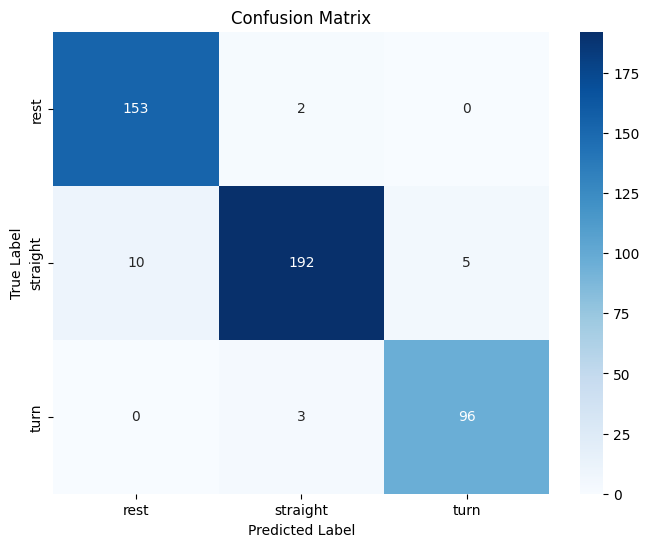

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [83]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

# Generate predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. Metrics such as F1-score, accuracy, precision, recall, and cross-validation score are used to assess the model. While a lower test score can reflect overfitting, a high cross-validation score indicates a reasonable bias-variance trade-off. A good match is indicated by accuracy near the cross-validation score. The categorization report and confusion matrix provide more information about areas that need improvement.
2. This can be done by varying the regularization strength to minimize the hazards of underfitting or overfitting, and by selecting large ranges for C and gamma that span many orders of magnitude. When tuning, these intervals are an excellent place to start. To further improve the model, the intervals should be increased if the ideal parameters are close to the margins.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [84]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
X1 = test_set1.drop('motion_state', axis=1)  # Features for test_set1
y1 = test_set1['motion_state']  # Target for test_set1

X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var,ax_min,ay_min,az_min,gx_min,gy_min,gz_min,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,3.920063e-08,3.655217e-09,6.507877e-10,7.727190e-10,3.437614e-08,1.003403e-09,-0.001191,-0.000473,0.024026,-0.000168,-0.000065,-0.000102,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,4.112300e-08,3.349120e-09,6.788807e-10,8.871433e-10,3.613404e-08,9.791644e-10,-0.001104,-0.000408,0.024030,-0.000148,-0.000076,-0.000094,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [85]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
X2 = test_set2.drop('motion_state', axis=1)  # Features for test_set2
y2 = test_set2['motion_state']  # Target for test_set2

X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var,ax_min,ay_min,az_min,gx_min,gy_min,gz_min,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,6.324738e-08,1.718706e-09,1.211633e-09,1.405038e-09,6.614559e-08,7.031396e-10,-0.002970,0.000257,0.048347,-0.000115,-0.000095,-0.000122,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,3.110085e-07,2.179497e-09,1.893673e-09,1.164381e-09,3.344639e-07,9.305619e-10,-0.003824,-0.000567,0.047687,-0.000128,-0.000132,-0.000098,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [86]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
# Calculate and print test score accuracy for test_set1
test_set1_score = grid.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print test score accuracy for test_set2
test_set2_score = grid.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

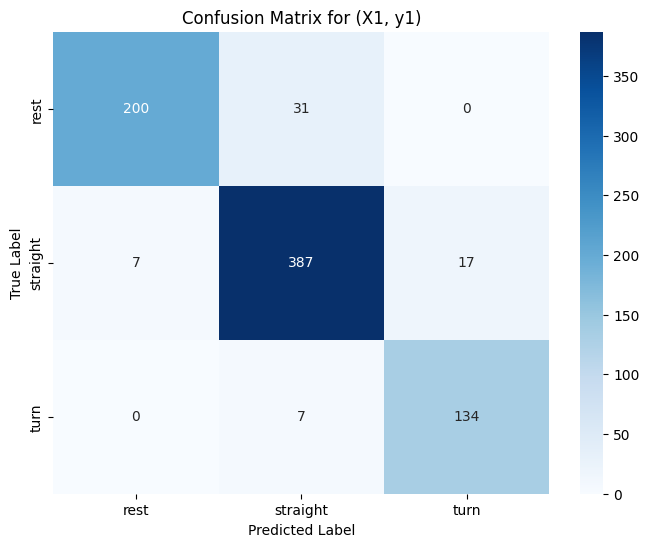

              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [87]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

# Predict on X1
y_pred1 = grid.predict(X1)

# Generate confusion matrix
cm1 = confusion_matrix(y1, y_pred1)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for (X1, y1)')
plt.show()

# Print classification report
print(classification_report(y1, y_pred1, target_names=grid.classes_))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

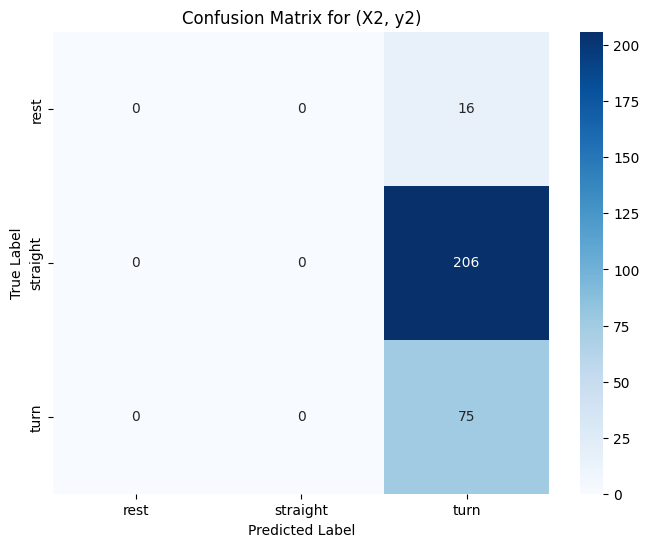

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on X2
y_pred2 = grid.predict(X2)

# Generate confusion matrix
cm2 = confusion_matrix(y2, y_pred2)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for (X2, y2)')
plt.show()

# Print classification report
print(classification_report(y2, y_pred2, target_names=grid.classes_))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model does well on datasets 1 and training, but its accuracy drastically declines on dataset 2. Given how poorly the model generalizes to new data, this points to overfitting. When disparities in data distributions between training and testing sets result in lower prediction accuracy, the performance gap points to a dataset shift or domain adaptation problem.
2. Changes in feature distributions, modifications to the environment or sensors, and class imbalance in fresh data can all cause the model to misclassify samples. These elements result in poor performance for underrepresented classes and mistakes on unseen samples. Robust feature selection, domain adaptability, and the incorporation of different data can all lead to improvements.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [90]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [91]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print(y)

0           rest
1           rest
2       straight
3           turn
4           turn
          ...   
1529        turn
1530    straight
1531    straight
1532    straight
1533        rest
Name: motion_state, Length: 1534, dtype: object


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [92]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Create a pipeline with scaler and classifier
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', SVC())])

# Define the parameter grid for GridSearchCV
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Perform GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train) # Display output.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [24]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test set accuracy: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

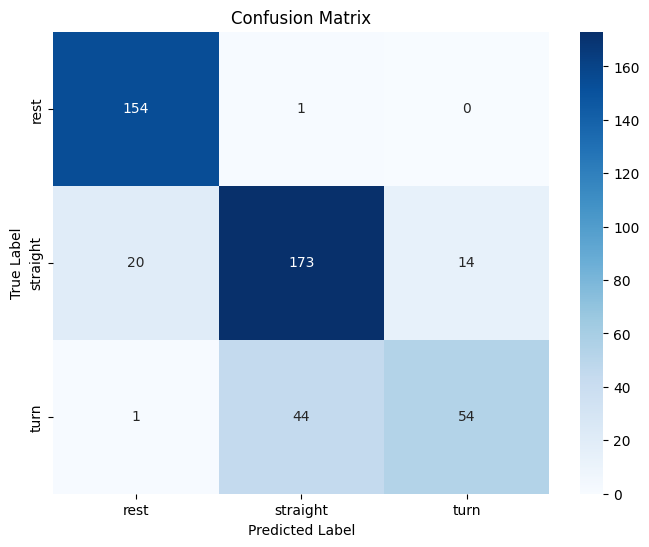

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [25]:
# TODO - Display confusion matrix and print classification reports

# Predict on the test set
y_pred = grid.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=grid.classes_))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. The first model performs better than the second in terms of accuracy, recall, F1-score, and confusion matrix metrics, suggesting a superior match in these assessments. But when it comes to predicting "turn," the second model's accuracy significantly declines, indicating that it performs worse in this domain.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [93]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [94]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [95]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

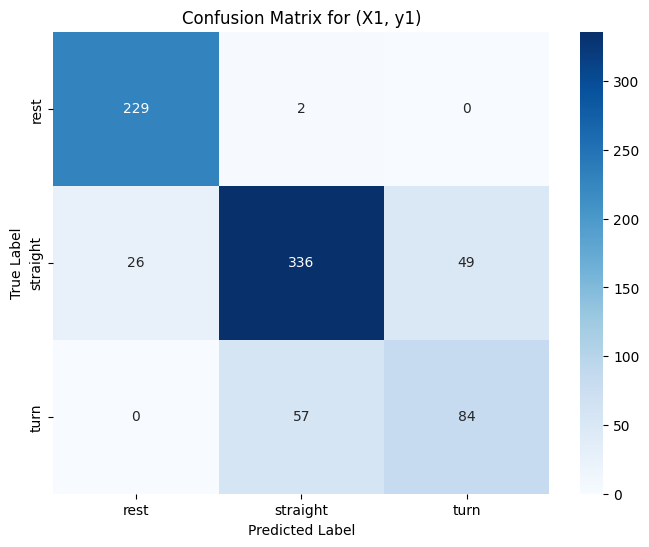

              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [96]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on X1
y_pred1 = grid.predict(X1)

# Generate confusion matrix
cm1 = confusion_matrix(y1, y_pred1)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for (X1, y1)')
plt.show()

# Print classification report
print(classification_report(y1, y_pred1, target_names=grid.classes_))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

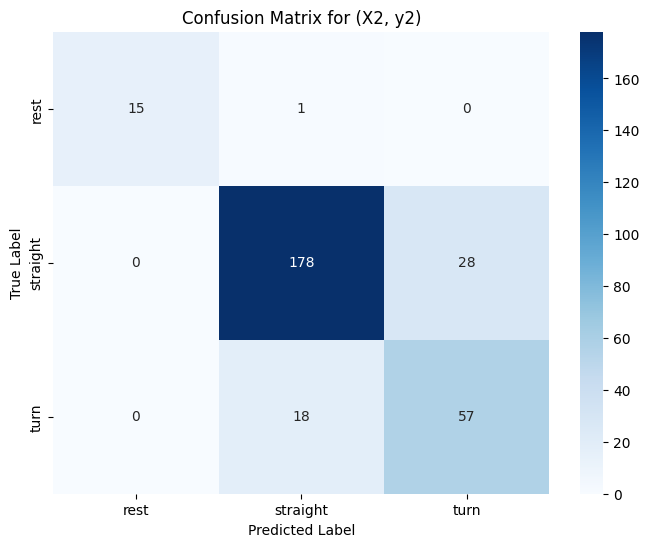

              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [97]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Predict on X2
y_pred2 = grid.predict(X2)

# Generate confusion matrix
cm2 = confusion_matrix(y2, y_pred2)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for (X2, y2)')
plt.show()

# Print classification report
print(classification_report(y2, y_pred2, target_names=grid.classes_))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. The measurements show that the model fits both the unseen testing dataset and the training/validation dataset rather well. It does well while it is at rest and when moving in a straight line, but it has the most trouble when it is turning.
2. On the training/validation dataset, the model in Section 1 performs well; however, on the testing dataset, it exhibits a notable decline, suggesting overfitting. On the other hand, the model in Section 2 exhibits a better fit and performs well on both the testing and training/validation datasets. As a result, Section 2's model performs better than Section 1.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1. Ax_sum, ax_var, ay_sum, ay_var, a_sum, gz_sum, and gz_var are the characteristics that have been chosen. These were used because the model performs well in identifying various vehicle movements because to the contributions of ax_var, ay_var, a_sum, and gz_var. Furthermore, there is a precise correlation between acceleration, deceleration, and turning and ax_sum, ay_sum, and gz_var.   

In [103]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_sum', 'ax_var', 'ay_sum', 'ay_var', 'a_sum', 'gz_sum', 'gz_var']]
X.head(2)

,ax_sum,ax_var,ay_sum,ay_var,a_sum,gz_sum,gz_var
0,-0.003929,8.046094e-07,-0.093081,1.319665e-07,9.797418,-0.001391,7.446916e-10
1,-0.000966,1.032619e-06,-0.092417,1.073067e-07,9.798815,-0.001943,6.983481e-10


In [104]:
# TODO - Load motion_state column (target vector) into y

# Replace 'motion_state' with the actual name of the target column
y = cv_set['motion_state']  # Extract the target column into y

# Display the first few rows of y to confirm
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [106]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler, will be tuned later
    ('classifier', SVC())
])

# hyperparameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler()],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-validation Accuracy: {grid.best_score_}")


Best Parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best Cross-validation Accuracy: 0.9534101282329928


___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [107]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


In [108]:
# TODO: Print the results from the grid search

# Print the best parameters from the grid search
print("Best params:\n{}\n".format(grid.best_params_))

# Print the best cross-validation training score
# Ensure `return_train_score=True` is used in GridSearchCV to access training scores
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Evaluate the model on the test set (replace X_test, y_test with your actual test set variables)
best_model = grid.best_estimator_
test_set_score = best_model.score(X_test, y_test)  # Use actual test dataset
print("Test-set score: {:.2f}".format(test_set_score))


Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.99
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model using the *test* split.

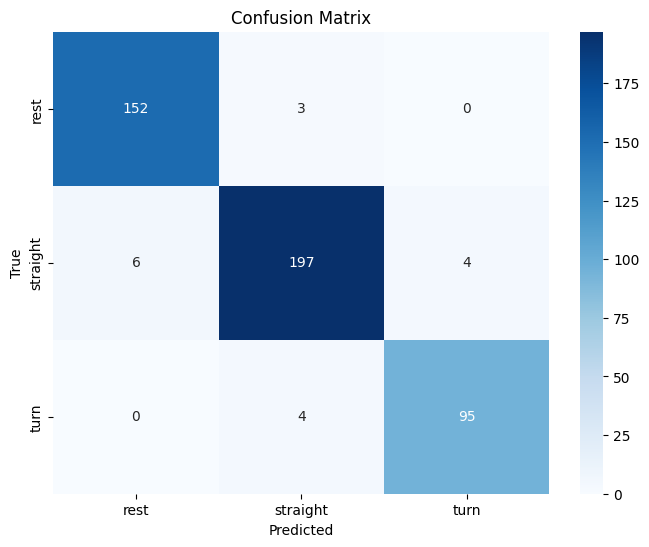


Classification Report:
              precision    recall  f1-score   support

        rest       0.96      0.98      0.97       155
    straight       0.97      0.95      0.96       207
        turn       0.96      0.96      0.96        99

    accuracy                           0.96       461
   macro avg       0.96      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [109]:
# TODO - Display confusion matrix and print classification report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [110]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1

# Replace 'motion_state' with the name of the target column
y1 = test_set1['motion_state']  # Extract the target column as y1

# Replace 'selected_features' with the list of selected features used during training
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example list of selected features
X1 = test_set1[selected_features]  # Extract the selected features as X1

# Display the first two rows of features to confirm
X1.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999


In [111]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2

# Replace 'motion_state' with the actual name of the target column
y2 = test_set2['motion_state']  # Extract the target column into y2

# Replace 'selected_features' with the list of selected features used during training
selected_features = ['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum']  # Example selected features
X2 = test_set2[selected_features]  # Extract the selected features into X2

# Display the first two rows of features to confirm
X2.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [112]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_sum', 'ax_var', 'ay_sum', 'ay_var', 'a_sum', 'gz_sum', 'gz_var']]
X1.head(2)

# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_sum', 'ax_var', 'ay_sum', 'ay_var', 'a_sum', 'gz_sum', 'gz_var']]
X2.head(2)




,ax_sum,ax_var,ay_sum,ay_var,a_sum,gz_sum,gz_var
0,-0.046400,0.000002,0.305907,3.020959e-07,9.800683,-0.001901,1.405038e-09
1,-0.050073,0.000003,0.311947,6.859937e-07,9.797741,-0.002051,1.164381e-09


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [113]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1, y_pred1))

print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y_pred1))



Confusion Matrix for Test Set 1:
[[229   2   0]
 [ 26 336  49]
 [  0  57  84]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [114]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print("Confusion matrix:")
print(confusion_matrix(y2, y_pred2))
print("Classification report:")
print(classification_report(y2, y_pred2, zero_division=0))

Confusion matrix:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]
Classification report:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.(1) Compared to Section 1, the Section 3 model's accuracy on Test Set 1 (79%) was greater, suggesting less overfitting, most likely as a result of using fewer characteristics. However, compared to Section 1, its performance on Test Set 2 (25% accuracy) was noticeably poorer, indicating that the model would not transfer well to this specific dataset.

1.(2) On Test Set 1, the Section 3 model fared somewhat better than Section 2, with an accuracy of 79% as opposed to 69% for Section 2. On Test Set 2, however, Section 2's accuracy remained substantially higher at 69%, while Section 3's performance drastically declined to 25%. This suggests that Section 3 is less flexible when it comes to different datasets.

2.1) Feature Selection: The model's generalization on Test Set 1 was enhanced by fewer features, but its capacity to adjust to Test Set 2, where it did badly, was constrained.

2) Data Distribution Mismatch: It was difficult for the Section 3 model to adjust and function properly since the distribution of data in Test Set 2 differed from that in the training set.

3) Overfitting vs. Generalization: While Sections 2 and 3 employed fewer features to improve Test Set 1 accuracy at the expense of flexibility in dealing with new, unknown data, Section 1's model collected noise, which improved its performance on Test Set 2.


____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [115]:
# TODO - Load all features from cv_set to X

# Drop the target column ('motion_state') to ensure X only contains the features
X = cv_set.drop(columns=['motion_state'])  # Replace 'motion_state' with the actual target column name

# Display the first two rows to verify
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var,ax_min,ay_min,az_min,gx_min,gy_min,gz_min,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,3.267073e-08,2.365611e-09,6.964705e-10,7.446916e-10,3.334598e-08,6.879234e-10,-0.001539,-0.001109,0.023869,-0.000178,-0.00007,-0.000082,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,1.529967e-08,2.242613e-09,6.533136e-10,6.983481e-10,1.588712e-08,6.794409e-10,-0.001752,-0.001025,0.024146,-0.000141,-0.00008,-0.000090,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [116]:
# TODO - Load motion_state column (target vector) into y
# Extract the target column ('motion_state') into y
y = cv_set['motion_state']  # Replace 'motion_state' with the actual name of the target column

# Display the first few rows to confirm
y.head()

,motion_state
0,rest
1,rest
2,straight
3,turn
4,turn


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [117]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 1073 samples
Testing set: 461 samples


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [118]:
# Perform any missing imports
from sklearn.decomposition import PCA
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('pca', PCA()),            # Apply PCA
    ('classifier', SVC())      # SVC Classifier
])
print("Pipeline initialized.")

Pipeline initialized.


Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [119]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],  # Number of PCA components
    'classifier__C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1], # Kernel coefficient
    'classifier__kernel': ['rbf']            # Radial Basis Function Kernel
}
print("Parameter grid defined.")

Parameter grid defined.


In [120]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [121]:
# TODO: Print the results from the grid search

# TODO: Print the results from the grid search

# Print the best parameters found during the grid search
print("Best params:\n{}\n".format(grid.best_params_))

# Ensure return_train_score=True in GridSearchCV to access training scores
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
print("Best cross-validation train score: {:.2f}".format(best_train_score))

# Print the best cross-validation validation score
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Evaluate the model on the test set
best_model = grid.best_estimator_  # Extract the best model from the grid search
test_set_score = best_model.score(X_test, y_test)  # Calculate accuracy on the test set
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'classifier__C': 100, 'classifier__gamma': 1, 'classifier__kernel': 'rbf', 'pca__n_components': 7}

Best cross-validation train score: 0.94
Best cross-validation validation score: 0.92
Test-set score: 0.92


Display the confusion matrix and print the classification report for the trained model using the *test* split.

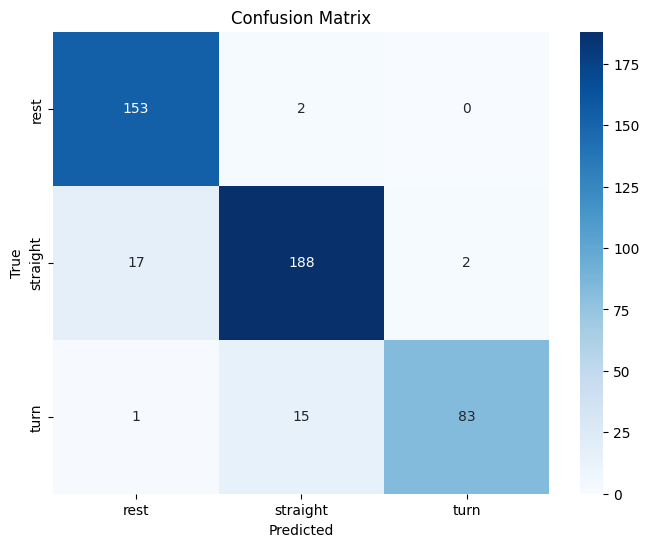


Classification Report:
              precision    recall  f1-score   support

        rest       0.89      0.99      0.94       155
    straight       0.92      0.91      0.91       207
        turn       0.98      0.84      0.90        99

    accuracy                           0.92       461
   macro avg       0.93      0.91      0.92       461
weighted avg       0.92      0.92      0.92       461



In [122]:
# TODO - Display confusion matrix and print classification report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report

# Predict on the test set
y_test_pred = grid.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [123]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1

# Replace 'motion_state' with the actual name of the target column
y1 = test_set1['motion_state']  # Extract the target column

# Extract all features by dropping the target column
X1 = test_set1.drop(columns=['motion_state'])  # Replace 'motion_state' with the actual target column name

# Display the first two rows of features to confirm
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var,ax_min,ay_min,az_min,gx_min,gy_min,gz_min,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,3.920063e-08,3.655217e-09,6.507877e-10,7.727190e-10,3.437614e-08,1.003403e-09,-0.001191,-0.000473,0.024026,-0.000168,-0.000065,-0.000102,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,4.112300e-08,3.349120e-09,6.788807e-10,8.871433e-10,3.613404e-08,9.791644e-10,-0.001104,-0.000408,0.024030,-0.000148,-0.000076,-0.000094,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [124]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2


# Replace 'motion_state' with the actual name of the target column
y2 = test_set2['motion_state']  # Extract the target column

# Extract all features by dropping the target column
X2 = test_set2.drop(columns=['motion_state'])  # Replace 'motion_state' with the actual target column name

# Display the first two rows of features to confirm
X2.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,a_var,g_var,ax_min,ay_min,az_min,gx_min,gy_min,gz_min,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,6.324738e-08,1.718706e-09,1.211633e-09,1.405038e-09,6.614559e-08,7.031396e-10,-0.002970,0.000257,0.048347,-0.000115,-0.000095,-0.000122,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,3.110085e-07,2.179497e-09,1.893673e-09,1.164381e-09,3.344639e-07,9.305619e-10,-0.003824,-0.000567,0.047687,-0.000128,-0.000132,-0.000098,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [125]:
# TODO - Print test score accuracies for test_set1 and test_set2


# Calculate and print the test set score for test_set1
test_set1_score = grid.best_estimator_.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Calculate and print the test set score for test_set2
test_set2_score = grid.best_estimator_.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.94


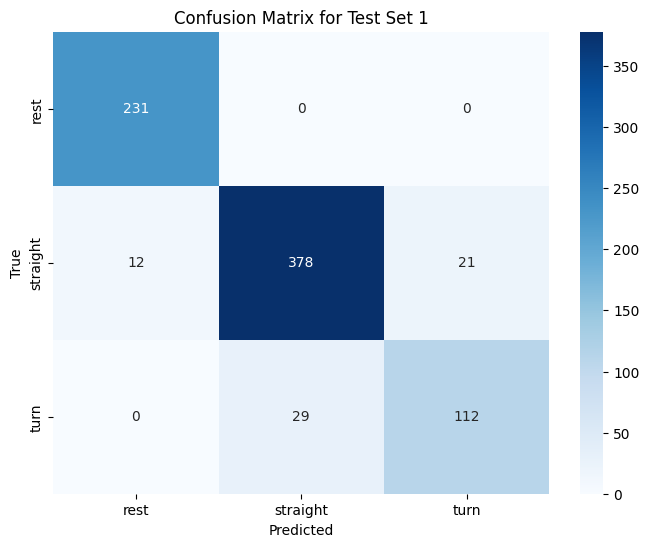


Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.95      1.00      0.97       231
    straight       0.93      0.92      0.92       411
        turn       0.84      0.79      0.82       141

    accuracy                           0.92       783
   macro avg       0.91      0.90      0.91       783
weighted avg       0.92      0.92      0.92       783



In [126]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Generate the confusion matrix
cm1 = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Print the classification report
print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [127]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2, y_pred2))

print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y_pred2))


Confusion Matrix for Test Set 2:
[[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

Q1. Section 1 (All Features): PCA reduces dimensionality, which makes the model more economical, but its test accuracy (92%) is marginally lower than that of the all-features model (97%).

Section 2 (Selected Features): PCA captures better patterns from the data, as evidenced by the fact that its test accuracy (92%) is higher than that of the selected-features model (84%).

Section 3 (Group Selected Features): The PCA test accuracy (92%) is more efficient by lowering features and is on par with or somewhat superior to the group-selected features model (93%).

Q2. 1) Dimensionality Reduction: While Section 1 uses all features, including potentially unimportant ones, PCA concentrates on the most significant patterns by decreasing noise.

2) Efficiency: While Section 1 uses more processing resources for comparable performance (97%), PCA achieves high accuracy (92%) with fewer components.


## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [128]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [129]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head(2)

,motion_state
0,rest
1,rest


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [130]:
# TODO - Perform train/test split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Perform any missing imports

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

In [132]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'model__n_estimators': [300, 400, 500],  #Tree count
    'model__max_depth': [None, 10, 20, 30],  #Depth
}

In [133]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__n_estimators': [300, 400, 500]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [134]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))


Best params:
{'model__max_depth': 10, 'model__n_estimators': 500}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.85
Test-set score: 0.86


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion matrix:
[[103   1   0]
 [  4 120  13]
 [  0  25  41]]


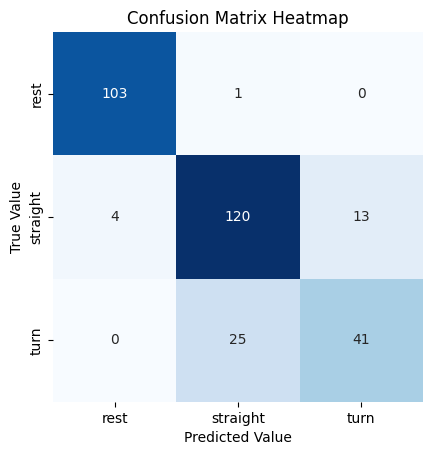

Classification report:
              precision    recall  f1-score   support

        rest       0.96      0.99      0.98       104
    straight       0.82      0.88      0.85       137
        turn       0.76      0.62      0.68        66

    accuracy                           0.86       307
   macro avg       0.85      0.83      0.84       307
weighted avg       0.86      0.86      0.86       307



In [135]:
# TODO - Display confusion matrix and print classification report

import seaborn as sns
import matplotlib.pyplot as plt
y_pred = grid.predict(X_test)
print("Confusion matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],
            yticklabels=['rest', 'straight', 'turn'],
            square=True, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix Heatmap')
plt.show()

print("Classification report:")
print(classification_report(y_test, y_pred, zero_division=0))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [136]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [137]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [138]:
# TODO - Print test score accuracies for test_set1 and test_set2
test_set1_score = grid.score(X1, y1)
test_set2_score = grid.score(X2, y2)
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.85
test_set2 score: 0.69


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion matrix of test_set1:
[[227   4   0]
 [  5 357  49]
 [  0  57  84]]


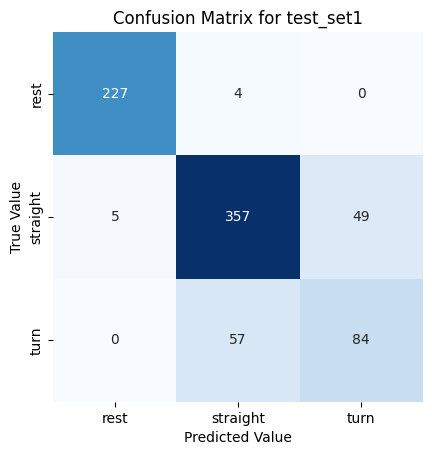

Classification report:
              precision    recall  f1-score   support

        rest       0.98      0.98      0.98       231
    straight       0.85      0.87      0.86       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.85       783
   macro avg       0.82      0.82      0.82       783
weighted avg       0.85      0.85      0.85       783



In [139]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = grid.predict(X1)
conf_mat1 = confusion_matrix(y1, y1_pred)

print("Confusion matrix of test_set1:")
conf_mat = confusion_matrix(y1, y1_pred)
print(conf_mat1)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],
            yticklabels=['rest', 'straight', 'turn'],
            square=True, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for test_set1')
plt.show()

print("Classification report:")
print(classification_report(y1, y1_pred, zero_division=0))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion matrix of test_set2:
[[  1  15   0]
 [  0 132  74]
 [  0   4  71]]


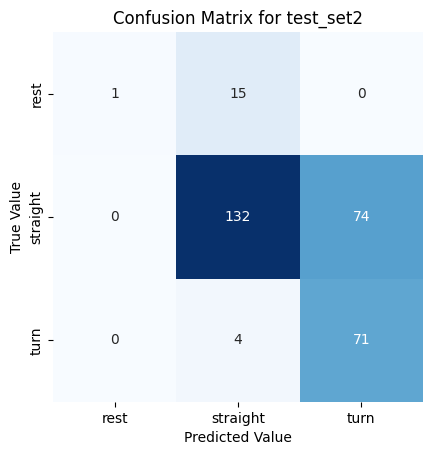

Classification report:
              precision    recall  f1-score   support

        rest       1.00      0.06      0.12        16
    straight       0.87      0.64      0.74       206
        turn       0.49      0.95      0.65        75

    accuracy                           0.69       297
   macro avg       0.79      0.55      0.50       297
weighted avg       0.78      0.69      0.68       297



In [140]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.predict(X2)
conf_mat2 = confusion_matrix(y2, y2_pred)

print("Confusion matrix of test_set2:")
conf_mat = confusion_matrix(y2, y2_pred)
print(conf_mat2)
sns.heatmap(conf_mat, xticklabels=['rest', 'straight', 'turn'],
            yticklabels=['rest', 'straight', 'turn'],
            square=True, annot=True, cbar=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix for test_set2')
plt.show()

print("Classification report:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1. Overall Performance of the Model:

Random Forest outperformed SVC (83%), achieving a marginally higher accuracy of 85% on test_set 1.
With an accuracy of 69% on test_set2, both models performed similarly, suggesting difficulties with generalization to this dataset.
2. Differences in Class-Level Predictions:

In both datasets, Random Forest's predictions for "straight" and "turn" were more reliable, with steady precision and recall.
SVC's recall was incredibly low (e.g., barely 0.06 on test_set2), despite achieving very high precision for "rest," suggesting that it had trouble spotting unusual samples.
3. Reasons for Inconsistencies:

Random Forest has a modest advantage in balancing class predictions because of its ensemble learning method, which better captures nonlinear features and interactions.
Performance decreases were probably caused by SVC's sensitivity to data distribution and possible imbalance (e.g., "turn").



____